## Gathering Docs

### Run the following command in the jupyter terminal to clone MDN glossary repo: git clone https://github.com/mdn/content.git

## Set-Up

In [1]:
%pip install -U python-terrier jpype1

  Using cached python_terrier-1.0-py3-none-any.whl.metadata (987 bytes)
  Using cached jpype1-1.6.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (5.0 kB)
  Using cached pyterrier-1.0.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached more_itertools-10.8.0-py3-none-any.whl.metadata (39 kB)
  Using cached ir_datasets-0.5.11-py3-none-any.whl.metadata (12 kB)
  Using cached deprecated-1.3.1-py2.py3-none-any.whl.metadata (5.9 kB)
  Using cached ir_measures-0.4.3-py3-none-any.whl.metadata (7.0 kB)
  Using cached pytrec_eval_terrier-0.5.10-cp311-cp311-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (1.1 kB)
  Using cached pyjnius-1.7.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (13 kB)
  Using cached inscriptis-2.7.0-py3-none-any.whl.metadata (27 kB)
  Using cached trec_car_tools-2.6-py3-none-any.whl.metadata (640 bytes)
  Using cached warc3_wet-0.2.5-py3-none-any.whl.metadata (2.2 kB)
  Using cached warc3_wet_clu

In [2]:
%pip install python-frontmatter

  Using cached python_frontmatter-1.1.0-py3-none-any.whl.metadata (4.1 kB)
Using cached python_frontmatter-1.1.0-py3-none-any.whl (9.8 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install markdown

  Using cached markdown-3.10-py3-none-any.whl.metadata (5.1 kB)
Using cached markdown-3.10-py3-none-any.whl (107 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install nltk

  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached regex-2025.11.3-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (40 kB)
Using cached nltk-3.9.2-py3-none-any.whl (1.5 MB)
Using cached regex-2025.11.3-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (800 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install python-terrier datasets nltk flask

  Using cached datasets-4.4.1-py3-none-any.whl.metadata (19 kB)
  Using cached flask-3.1.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached filelock-3.20.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached pyarrow-22.0.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (3.2 kB)
  Using cached xxhash-3.6.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (13 kB)
  Using cached multiprocess-0.70.18-py311-none-any.whl.metadata (7.5 kB)
  Using cached huggingface_hub-1.1.7-py3-none-any.whl.metadata (13 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached werkzeug-3.1.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached hf_xet-1.2.0-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.9 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached typer_slim-0.20.0-py3-none-any.whl.metadata (16 kB)
  Using cach

In [18]:
import os 
from pathlib import Path
import pandas as pd
import numpy as np
import frontmatter
import re
import markdown
from bs4 import BeautifulSoup
import pyterrier as pt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import html
from flask import Flask, request, render_template
import requests
import urllib3
import time

In [19]:
mdn_glossary_path = Path(f"{os.getcwd()}/content/files/en-us/glossary")

# veriyfing that all the files are there
for item in mdn_glossary_path.iterdir():
    print(item)

/home/jovyan/TechGlossary/TechGlossary/content/files/en-us/glossary/closure
/home/jovyan/TechGlossary/TechGlossary/content/files/en-us/glossary/cache
/home/jovyan/TechGlossary/TechGlossary/content/files/en-us/glossary/decryption
/home/jovyan/TechGlossary/TechGlossary/content/files/en-us/glossary/type_coercion
/home/jovyan/TechGlossary/TechGlossary/content/files/en-us/glossary/ril
/home/jovyan/TechGlossary/TechGlossary/content/files/en-us/glossary/buffer
/home/jovyan/TechGlossary/TechGlossary/content/files/en-us/glossary/callback_function
/home/jovyan/TechGlossary/TechGlossary/content/files/en-us/glossary/head
/home/jovyan/TechGlossary/TechGlossary/content/files/en-us/glossary/minification
/home/jovyan/TechGlossary/TechGlossary/content/files/en-us/glossary/uri
/home/jovyan/TechGlossary/TechGlossary/content/files/en-us/glossary/sdk
/home/jovyan/TechGlossary/TechGlossary/content/files/en-us/glossary/binding
/home/jovyan/TechGlossary/TechGlossary/content/files/en-us/glossary/webm
/home/jov

## Step 1. Parse MDN glossary repo

In [20]:
#To investigate content of a single document
term = "png"
with open(f"{os.getcwd()}/content/files/en-us/glossary/{term}/index.md", "r") as f:
    content = f.read()
    post = frontmatter.loads(content)
    
    html_content = markdown.markdown(post.content)
    
    # Extract plain text from HTML
    plain_text = BeautifulSoup(html_content, "html.parser").get_text()
    
    df = pd.DataFrame([plain_text], columns=["content"])
    
    display(df)

,content
0,"PNG (Portable Network Graphics) is a graphics file format that supports lossless data compression.\nSee also\n\nPNG section in the Image file type and format guide\nOther image formats (glossary terms): {{Glossary(""GIF"")}}, {{Glossary(""JPEG"")}}, {{Glossary(""SVG"")}}, {{Glossary(""WebP"")}}\nHTML images (Learn web development)\nAdding custom icons to your site\nPNG on Wikipedia\n"


In [45]:
# Creating df to build pyterrier index with html for later display 
def load_mdn_glossary_for_pyterrier(glossary_root: str) -> pd.DataFrame:
    """
    Iterate through all subfolders in the glossary folder,
    read each Markdown file, clean text for indexing, replace
    all double-bracketed shortcodes with just the first term,
    remove Markdown formatting, and return a DataFrame with columns:
    - docno: unique document identifier
    - text: cleaned plain text for search/indexing
    """
    rows = []

    # Regex to match any {{Shortcode("term", ...)}}
    double_bracket_regex = re.compile(
        r'\{\{\s*[\w]+\(\s*["\'](.*?)["\'].*?\)\s*\}\}', re.IGNORECASE
    )

    for term_folder in os.listdir(glossary_root):
        folder_path = os.path.join(glossary_root, term_folder)
        if os.path.isdir(folder_path):
            md_file = os.path.join(folder_path, "index.md")
            if os.path.exists(md_file):
                try:
                    # Load Markdown with frontmatter
                    post = frontmatter.load(md_file)

                    # Replace any {{Shortcode(...)}} with just the first argument
                    content_no_placeholders = double_bracket_regex.sub(r'\1', post.content)

                    # Convert Markdown → HTML
                    html_content = markdown.markdown(content_no_placeholders)

                    # Convert HTML → plain text (removes **bold**, links, code formatting)
                    plain_text = BeautifulSoup(html_content, "html.parser").get_text()

                    # Clean up extra whitespace
                    clean_text = re.sub(r"\s+", " ", plain_text).strip()

                    # Assign docno (using folder name)
                    docno = term_folder

                    # Add row to DataFrame
                    rows.append({
                        "docno": docno,
                        "text": clean_text
                    })

                except Exception as e:
                    print(f"Error processing {md_file}: {e}")

    df = pd.DataFrame(rows, columns=["docno", "text"])
    return df

glossary_root = f"{os.getcwd()}/content/files/en-us/glossary"
mdn_df = load_mdn_glossary_for_pyterrier(glossary_root)

pd.set_option("display.max_colwidth", None)  # do not truncate text
display(mdn_df)

,docno,text
0,closure,"In computer programming, a closure is a technique for implementing lexically scope name binding in a language with first-class function. In JavaScript, a function creates a closure context. See also Closures in JavaScript Closure on Wikipedia"
1,cache,A cache (web cache or HTTP cache) is a component that stores HTTP responses temporarily so that it can be used for subsequent HTTP requests as long as it meets certain conditions. See also Web cache on Wikipedia
2,decryption,"In cryptography, decryption is the conversion of ciphertext into plaintext. Decryption is an operation which transforms a ciphertext message into plaintext using a cryptographic algorithm called a cipher. Like encryption, decryption in modern ciphers is performed by using a specific algorithm and a secret, called the key. Decryption is the reverse process of encryption and if the key stays secret, is mathematically hard to perform. How hard it is depends on how secure the cryptographic algorithm is, and that in itself is subject to change as the study of cryptanalysis advances. See also Related glossary terms: Encryption Cipher Cryptography"
3,type_coercion,"Type coercion is the automatic or implicit conversion of values from one data type to another (such as strings to numbers). Type conversion is similar to type coercion because they both convert values from one data type to another with one key difference — type coercion is implicit whereas type conversion can be either implicit or explicit. Examples ```js const value1 = ""5""; const value2 = 9; let sum = value1 + value2; console.log(sum); ``` In the above example, JavaScript has coerced the 9 from a number into a string and then concatenated the two values together, resulting in a string of 59. JavaScript had a choice between a string or a number and decided to use a string. The compiler could have coerced the 5 into a number and returned a sum of 14, but it did not. To return this result, you'd have to explicitly convert the 5 to a number using the Global_Objects/Number method: js sum = Number(value1) + value2; See also Type conversion (Wikipedia) Related glossary terms: Type Type conversion"
4,ril,"RIL (Radio Interface Layer) is a mobile operating system component which communicates between the device's software and the device's phone, radio, or modem hardware. See also Radio Interface Layer on Wikipedia"
...,...,...
597,copyleft,"Copyleft is a term, usually referring to a license, used to indicate that such license requires that redistribution of said work is subject to the same license as the original. Examples of copyleft licenses are the GNU GPL (for software) and the Creative Commons SA (Share Alike) licenses (for works of art). See also Copyleft on Wikipedia"
598,cryptography,"Cryptography, or cryptology, is the science that studies how to encode and transmit messages securely. Cryptography designs and studies algorithms used to encode and decode messages in an insecure environment, and their applications. More than just data confidentiality, cryptography also tackles identification, authentication, non-repudiation, and data integrity. Therefore it also studies usage of cryptographic methods in context, cryptosystems. See also Cryptography on Wikipedia Related glossary terms: Block cipher mode of operation Cipher Ciphertext Cipher suite Cryptanalysis Decryption Encryption Key Plaintext Public-key cryptography Symmetric-key cryptography"
599,xforms,XForms is a convention for building Web forms and processing form data in the XML format. [!NOTE] No major browser supports XForms any longer—we suggest using Web forms instead.
600,flow_relative_values,"In CSS, flow relative values are directional keyword values relative to an element's block and inline axes. These values include block-start, block-end, inline-start, inline-end, start, and end. In CSS, physical properties define positions based on physical directions and reference specific sides of an element. CSS logical propert

## Parse glossaryTech

In [46]:
# Run this once to download all the glossary files onto your local
# downloading all the glossary terms from https://glossarytech.com
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
base_url = "https://glossarytech.com"
categories = {'game_development': 1, 'software-infrastructure-devops': 8, 'quality_assurance-qa': 6, 
              'web_design': 3, 'front_end-technologies': 7, 'javascript': 2, 'java': 6, 'golang': 1, 'ios': 3, 
              'android': 2, 'cross_platform-hybrid': 2, 'databases': 5, 'product_management': 1, 'project_management': 2, 
             'leadership': 2, 'development_methodologies': 1, 'software_architecture': 3, 'fundamental_programming_concepts': 1, 
             'programming_paradigms': 1, 'data-science': 6, 'artificial-intelligence-ai': 3, 'tools': 9, 'roles_in_software_development': 2, 
             'embedded': 1, 'cloud_computing': 3, 'cyber_security': 4, 'blockchain': 3, 'general_terms': 12}

directory = "glossary_tech"
os.makedirs(directory, exist_ok=True)
total_pages = 0
if os.listdir(directory):
    print(f"Directory '{directory}' already has content. Skipping download.")
else:
    for category, num_pages in categories.items():
        for i in range(1, num_pages + 1): 
            url = f"{base_url}/terms/{category}" if i == 1 else f"{base_url}/terms/{category}/page{i}"
            r = requests.get(url, verify=False)
            if r.status_code != 200:
                continue
            filepath = os.path.join(directory, f"{category}_page{i}.html")
            with open(filepath, "w", encoding="utf-8") as f:
                f.write(r.text)
            print(f"Saving file: {category}_page{i}.html")
            total_pages += 1
            time.sleep(0.5)
print(f"Downloaded {total_pages} pages from glossary tech")

Directory 'glossary_tech' already has content. Skipping download.
Downloaded 0 pages from glossary tech


In [47]:
glossary_items = []

def clean_text_from_cell(cell):
    text = " ".join(cell.stripped_strings)
    text = html.unescape(text) # unescape HTML entities
    text = text.replace('\xa0', ' ') # replace non-breaking space with normal space
    text = re.sub(r'\s+([?,.!;:])', r'\1', text) # remove space before punctuation: "XML , " -> "XML,"
    text = re.sub(r'([?,.!;:])\s*', r'\1 ', text) # one space after punctuation
    text = re.sub(r'\s+\)', r')', text) # spaces around opening parenthesis
    text = re.sub(r'\(\s+', r'(', text) # spaces around closing parenthesis
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def load_html_glossary(filepath):
    with open(filepath, "r", encoding="utf-8") as f:
        html_content = f.read()
    
    soup = BeautifulSoup(html_content, "html.parser")
    tables = soup.find_all("table")
    for table in tables: 
        rows = table.find_all("tr", attrs={"data-term": True})
        for row in rows: 
            cells = row.find_all("td")
            if len(cells) >= 2:  
                term = clean_text_from_cell(cells[0])
                description = clean_text_from_cell(cells[1])
            glossary_items.append({'docno': term, 'text': description})


directory = "glossary_tech"
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)  
    if os.path.isfile(filepath): # check not subdirectory 
        load_html_glossary(filepath)
        
html_df = pd.DataFrame(glossary_items)
# print(html_df.head())
display(html_df)
print(f"Number of terms parsed: {len(html_df)}")

,docno,text
0,Geth,A command line interface for running Ethereum node implemented in Go Language.
1,Hardhat,"A development environment to compile, deploy, test, and debug Ethereum software. It helps developers manage and automate the recurring tasks that are inherent to the process of building smart contracts and dApps."
2,Hyperledger,"A global enterprise blockchain project that offers the necessary framework, standards, guidelines, and tools to build open-source blockchains and related applications for use across various industries."
3,Hyperledger Fabric,"An open source, permissioned blockchain framework. It is a modular, general-purpose framework that offers unique identity management and access control features, which make it suitable for a variety of industry applications such as track-and-trace of supply chains, trade finance, loyalty and rewards, as well as clearing and settlement of financial asset"
4,Layer 1,"A set of solutions that improve the base protocol itself to make the overall system a lot more scalable. There are two most common layer-1 solutions, and these are the consensus protocol changes as well as sharding."
...,...,...
2152,Project Loom,Project Loom is an experimental project within the Java ecosystem that aims to simplify concurrency for developers.
2153,Project Panama,"Project Panama is an OpenJDK project focused on improving the connection between Java and native code, particularly written in C and C++. This feature provides an API for Java applications to interoperate with code and data outside the Java runtime by efficiently invoking foreign functions and by safely accessing foreign memory that is not managed by the JVM."
2154,Quarkus,"Quarkus is a Java framework optimized for Kubernetes, compatible with both GraalVM and HotSpot. Quarkus is constructed from top-quality Java libraries and adheres to industry standards. With Quarkus, developers can build Java applications that use less memory and start up quickly, which is essential for modern, cloud-based environments."
2155,Reactor,"Reactor is a reactive programming library for the Java language which provides the basis for developing non-blocking applications, thus representing a change in how we think about an application’s execution model."


Number of terms parsed: 2157


In [48]:
# Combining the two tables together (html_df & mdn_df)
print(html_df.dtypes)
print(mdn_df.dtypes)

df = pd.concat([html_df, mdn_df], ignore_index=True)
display(df)
print(f"Number of combined terms: {len(df)}")

docno    object
text     object
dtype: object
docno    object
text     object
dtype: object


,docno,text
0,Geth,A command line interface for running Ethereum node implemented in Go Language.
1,Hardhat,"A development environment to compile, deploy, test, and debug Ethereum software. It helps developers manage and automate the recurring tasks that are inherent to the process of building smart contracts and dApps."
2,Hyperledger,"A global enterprise blockchain project that offers the necessary framework, standards, guidelines, and tools to build open-source blockchains and related applications for use across various industries."
3,Hyperledger Fabric,"An open source, permissioned blockchain framework. It is a modular, general-purpose framework that offers unique identity management and access control features, which make it suitable for a variety of industry applications such as track-and-trace of supply chains, trade finance, loyalty and rewards, as well as clearing and settlement of financial asset"
4,Layer 1,"A set of solutions that improve the base protocol itself to make the overall system a lot more scalable. There are two most common layer-1 solutions, and these are the consensus protocol changes as well as sharding."
...,...,...
2754,copyleft,"Copyleft is a term, usually referring to a license, used to indicate that such license requires that redistribution of said work is subject to the same license as the original. Examples of copyleft licenses are the GNU GPL (for software) and the Creative Commons SA (Share Alike) licenses (for works of art). See also Copyleft on Wikipedia"
2755,cryptography,"Cryptography, or cryptology, is the science that studies how to encode and transmit messages securely. Cryptography designs and studies algorithms used to encode and decode messages in an insecure environment, and their applications. More than just data confidentiality, cryptography also tackles identification, authentication, non-repudiation, and data integrity. Therefore it also studies usage of cryptographic methods in context, cryptosystems. See also Cryptography on Wikipedia Related glossary terms: Block cipher mode of operation Cipher Ciphertext Cipher suite Cryptanalysis Decryption Encryption Key Plaintext Public-key cryptography Symmetric-key cryptography"
2756,xforms,XForms is a convention for building Web forms and processing form data in the XML format. [!NOTE] No major browser supports XForms any longer—we suggest using Web forms instead.
2757,flow_relative_values,"In CSS, flow relative values are directional keyword values relative to an element's block and inline axes. These values include block-start, block-end, inline-start, inline-end, start, and end. In CSS, physical properties define positions based on physical directions and reference specific sides of an element. CSS logical properties on the other hand define styles based on the document's writing mode and direction rather than the physical dimensions of the viewport. Logical properties are relative to the content flow and use directional keywords relative to the block and inline axes. Block direction The block axis refers to the axis that defines the stacking order of elements in a block layout. It's essentially the direction along which blocks of content — like paragraphs (p), headings, and divs (div) — are laid out on a webpage. This is also known as the block direction. In left-to-right and right-to-left languages, the block direction is the vertical direction of the content flow, going from top to bottom. The block-start and block-end directions represent the start edge and end edge of content along the block axis, or the ""from"" and ""to"" directions, respectively, with block-start being the equivalent of top and block-end being the equivalent of bottom in horizontal writing modes. Inline direction The inline axis is perpendicular to the block axis. The inline axis represents the direction along which inline content like text flows within a block. This is also known as the inline direction. In left-to-right writing modes, like English, the inl

Number of combined terms: 2759


## Pyterrier Set-Up

In [49]:
# Point PyTerrier to your freshly installed JDK
os.environ["JAVA_HOME"] = os.path.expanduser("~/jdk/jdk-17.0.8+7")
os.environ["JVM_PATH"]  = os.path.join(os.environ["JAVA_HOME"], "lib/server/libjvm.so")
os.environ["PATH"]      = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]

# Confirm libjvm.so exists
!ls $JVM_PATH

# Initialize PyTerrier
if not pt.java.started():
     pt.java.init()

print(" PyTerrier initialized successfully with local JDK.")

/home/jovyan/jdk/jdk-17.0.8+7/lib/server/libjvm.so
 PyTerrier initialized successfully with local JDK.


## Step 2. Pre-process 
Preprocessing choices determine what the model can “see.” We will adopt a minimal but effective pipeline:

- Lowercasing to normalize case.
- Tokenization on alphabetic words of length ≥3.
- Stopword removal to reduce high-frequency function words.
- Stemming to conflate morphological variants (e.g., “running” → “run”).

## Tokenization

In [26]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [w.lower() for w in tokens if w.isalpha() and w not in stop_words]
    tokens = [stemmer.stem(w) for w in tokens]
    return " ".join(tokens)

## Building the Pyterrier Index

In [73]:
# Pre-processing to add the term back into cleaned description to boost results for exact query matching 
df['clean_descr'] = df['text'].apply(clean_text)
df['clean_term'] = df['docno'].astype(str).apply(clean_text) 
df['clean_text'] = df['clean_term'] + " . " + df['clean_descr'] + " . " + df['clean_term']

display(df)


,docno,text,clean_text,clean_term,clean_descr
0,Geth,A command line interface for running Ethereum node implemented in Go Language.,geth . a command line interfac run ethereum node implement go languag . geth,geth,a command line interfac run ethereum node implement go languag
1,Hardhat,"A development environment to compile, deploy, test, and debug Ethereum software. It helps developers manage and automate the recurring tasks that are inherent to the process of building smart contracts and dApps.",hardhat . a develop environ compil deploy test debug ethereum softwar it help develop manag autom recur task inher process build smart contract dapp . hardhat,hardhat,a develop environ compil deploy test debug ethereum softwar it help develop manag autom recur task inher process build smart contract dapp
2,Hyperledger,"A global enterprise blockchain project that offers the necessary framework, standards, guidelines, and tools to build open-source blockchains and related applications for use across various industries.",hyperledg . a global enterpris blockchain project offer necessari framework standard guidelin tool build blockchain relat applic use across variou industri . hyperledg,hyperledg,a global enterpris blockchain project offer necessari framework standard guidelin tool build blockchain relat applic use across variou industri
3,Hyperledger Fabric,"An open source, permissioned blockchain framework. It is a modular, general-purpose framework that offers unique identity management and access control features, which make it suitable for a variety of industry applications such as track-and-trace of supply chains, trade finance, loyalty and rewards, as well as clearing and settlement of financial asset",hyperledg fabric . an open sourc permiss blockchain framework it modular framework offer uniqu ident manag access control featur make suitabl varieti industri applic suppli chain trade financ loyalti reward well clear settlement financi asset . hyperledg fabric,hyperledg fabric,an open sourc permiss blockchain framework it modular framework offer uniqu ident manag access control featur make suitabl varieti industri applic suppli chain trade financ loyalti reward well clear settlement financi asset
4,Layer 1,"A set of solutions that improve the base protocol itself to make the overall system a lot more scalable. There are two most common layer-1 solutions, and these are the consensus protocol changes as well as sharding.",layer . a set solut improv base protocol make overal system lot scalabl there two common solut consensu protocol chang well shard . layer,layer,a set solut improv base protocol make overal system lot scalabl there two common solut consensu protocol chang well shard
...,...,...,...,...,...
2754,copyleft,"Copyleft is a term, usually referring to a license, used to indicate that such license requires that redistribution of said work is subject to the same license as the original. Examples of copyleft licenses are the GNU GPL (for software) and the Creative Commons SA (Share Alike) licenses (for works of art). See also Copyleft on Wikipedia",copyleft . copyleft term usual refer licens use indic licens requir redistribut said work subject licens origin exampl copyleft licens gnu gpl softwar creativ common sa share alik licens work art see also copyleft wikipedia . copyleft,copyleft,copyleft term usual refer licens use indic licens requir redistribut said work subject licens origin exampl copyleft licens gnu gpl softwar creativ common sa share alik licens work art see also copyleft wikipedia
2755,cryptography,"Cryptography, or cryptology, is the science that studies how to encode and transmit messages securely. Cryptography designs and studies algorithms used to encode and decode messages in an insecure environment, and their applications. More than just data confidentiality, cryptography also tackles identification, authentication, non-repudiation, and data integrity. Therefore it also studies usage of cryptographic metho

In [74]:
display(df)
# Prepare documents for PyTerrier
docs_for_index = [{"docno": row["docno"], "text": row["clean_text"]} for _, row in df.iterrows()]
# print(docs_for_index)

# Build index
indexer = pt.IterDictIndexer("./glossary_index", overwrite=True)  # folder to store index
index_ref = indexer.index(docs_for_index)

# uncomment 2 previous lines if haven't build index yet
# index_ref = pt.IndexFactory.of("./glossary_index/data.properties")
print(f"Indexing complete! Your glossary is ready for retrieval.")

,docno,text,clean_text,clean_term,clean_descr
0,Geth,A command line interface for running Ethereum node implemented in Go Language.,geth . a command line interfac run ethereum node implement go languag . geth,geth,a command line interfac run ethereum node implement go languag
1,Hardhat,"A development environment to compile, deploy, test, and debug Ethereum software. It helps developers manage and automate the recurring tasks that are inherent to the process of building smart contracts and dApps.",hardhat . a develop environ compil deploy test debug ethereum softwar it help develop manag autom recur task inher process build smart contract dapp . hardhat,hardhat,a develop environ compil deploy test debug ethereum softwar it help develop manag autom recur task inher process build smart contract dapp
2,Hyperledger,"A global enterprise blockchain project that offers the necessary framework, standards, guidelines, and tools to build open-source blockchains and related applications for use across various industries.",hyperledg . a global enterpris blockchain project offer necessari framework standard guidelin tool build blockchain relat applic use across variou industri . hyperledg,hyperledg,a global enterpris blockchain project offer necessari framework standard guidelin tool build blockchain relat applic use across variou industri
3,Hyperledger Fabric,"An open source, permissioned blockchain framework. It is a modular, general-purpose framework that offers unique identity management and access control features, which make it suitable for a variety of industry applications such as track-and-trace of supply chains, trade finance, loyalty and rewards, as well as clearing and settlement of financial asset",hyperledg fabric . an open sourc permiss blockchain framework it modular framework offer uniqu ident manag access control featur make suitabl varieti industri applic suppli chain trade financ loyalti reward well clear settlement financi asset . hyperledg fabric,hyperledg fabric,an open sourc permiss blockchain framework it modular framework offer uniqu ident manag access control featur make suitabl varieti industri applic suppli chain trade financ loyalti reward well clear settlement financi asset
4,Layer 1,"A set of solutions that improve the base protocol itself to make the overall system a lot more scalable. There are two most common layer-1 solutions, and these are the consensus protocol changes as well as sharding.",layer . a set solut improv base protocol make overal system lot scalabl there two common solut consensu protocol chang well shard . layer,layer,a set solut improv base protocol make overal system lot scalabl there two common solut consensu protocol chang well shard
...,...,...,...,...,...
2754,copyleft,"Copyleft is a term, usually referring to a license, used to indicate that such license requires that redistribution of said work is subject to the same license as the original. Examples of copyleft licenses are the GNU GPL (for software) and the Creative Commons SA (Share Alike) licenses (for works of art). See also Copyleft on Wikipedia",copyleft . copyleft term usual refer licens use indic licens requir redistribut said work subject licens origin exampl copyleft licens gnu gpl softwar creativ common sa share alik licens work art see also copyleft wikipedia . copyleft,copyleft,copyleft term usual refer licens use indic licens requir redistribut said work subject licens origin exampl copyleft licens gnu gpl softwar creativ common sa share alik licens work art see also copyleft wikipedia
2755,cryptography,"Cryptography, or cryptology, is the science that studies how to encode and transmit messages securely. Cryptography designs and studies algorithms used to encode and decode messages in an insecure environment, and their applications. More than just data confidentiality, cryptography also tackles identification, authentication, non-repudiation, and data integrity. Therefore it also studies usage of cryptographic metho

Indexing complete! Your glossary is ready for retrieval.


## Quick Index Stats

In [75]:
index_ref = pt.IndexFactory.of(index_ref)
# uncomment previous line if loading index for the first time
stats = index_ref.getCollectionStatistics()
print(f"Documents: {stats.getNumberOfDocuments()}")
print(f"Unique terms: {stats.getNumberOfUniqueTerms()}")
print(f"Average doc length: {stats.getAverageDocumentLength():.2f}")

Documents: 2759
Unique terms: 5822
Average doc length: 33.54


## Applying TF-IDF

In [76]:
tfidf = pt.BatchRetrieve(index_ref, wmodel="TF_IDF")

# example test queries
sample_queries = [
    "javascript",
    "api"
]

for q in sample_queries:
    print(f"\nQuery: {q}")
    results = tfidf.search(q).head(5)
    display(results[['docno', 'score']])


Query: javascript


/tmp/ipykernel_247/300246346.py:1: DeprecationWarning: Call to deprecated class BatchRetrieve. (use pt.terrier.Retriever() instead) -- Deprecated since version 0.11.0.
  tfidf = pt.BatchRetrieve(index_ref, wmodel="TF_IDF")


,docno,score
0,javascript,3.402557
1,Isomorphic apps,3.278133
2,privileged_code,3.218997
3,sloppy_mode,3.176118
4,JavaScript bundler,3.124011



Query: api


,docno,score
0,SERP API,4.092605
1,Vector API,4.082423
2,API Endpoint,3.947276
3,RESTful API,3.883004
4,API Gateway,3.800493


## Applying BM25 

In [79]:
bm25 = pt.BatchRetrieve(index_ref, wmodel="BM25") 
results = bm25.search("xforms ") 
print(results)

  qid  docid   docno  rank      score    query
0   1   2756  xforms     0  19.731168  xforms 


/tmp/ipykernel_247/4207606192.py:1: DeprecationWarning: Call to deprecated class BatchRetrieve. (use pt.terrier.Retriever() instead) -- Deprecated since version 0.11.0.
  bm25 = pt.BatchRetrieve(index_ref, wmodel="BM25")


## Tuning BM25

In [80]:
# define the runing grid -- values we'll test for k1 & b
k1_values = [0.8, 1.0, 1.2, 1.5]
b_values = [0.3, 0.5, 0.75, 1.0]

# default set of sample queries
tuning_queries = [
    "javascript",
    "api",
    "css"
]

def avg_top_k_score(retriever, query, k=5):
    """Return the average score of the top-k results for a query."""
    res = retriever.search(query).head(k)
    return res["score"].mean() if len(res) > 0 else 0

results = []

print("Running BM25 parameter sweep...\n")

for k1 in k1_values:
    for b in b_values:
        retriever = pt.BatchRetrieve(index_ref, wmodel="BM25", properties={
            "k_1": k1,
            "b": b
        })

        # Evaluate this parameter pair using all sample queries
        scores = [avg_top_k_score(retriever, q) for q in tuning_queries]
        avg_score = np.mean(scores)

        results.append((k1, b, avg_score))
        print(f"k1={k1}, b={b} → Avg score = {avg_score:.4f}")

# Sort results by score (descending)
results_sorted = sorted(results, key=lambda x: x[2], reverse=True)

print("\n=== BM25 Tuning Results (best to worst) ===")
for k1, b, score in results_sorted:
    print(f"k1={k1}, b={b} → {score:.4f}")

best_k1, best_b, best_score = results_sorted[0]
print(f"\nBest BM25 parameters: k1={best_k1}, b={best_b} (avg score={best_score:.4f})")

Running BM25 parameter sweep...

k1=0.8, b=0.3 → Avg score = 6.7536
k1=0.8, b=0.5 → Avg score = 6.7536
k1=0.8, b=0.75 → Avg score = 6.7536
k1=0.8, b=1.0 → Avg score = 6.7536
k1=1.0, b=0.3 → Avg score = 6.7536
k1=1.0, b=0.5 → Avg score = 6.7536
k1=1.0, b=0.75 → Avg score = 6.7536
k1=1.0, b=1.0 → Avg score = 6.7536
k1=1.2, b=0.3 → Avg score = 6.7536


/tmp/ipykernel_247/3132967773.py:23: DeprecationWarning: Call to deprecated class BatchRetrieve. (use pt.terrier.Retriever() instead) -- Deprecated since version 0.11.0.
  retriever = pt.BatchRetrieve(index_ref, wmodel="BM25", properties={
/tmp/ipykernel_247/3132967773.py:23: DeprecationWarning: Call to deprecated class BatchRetrieve. (use pt.terrier.Retriever() instead) -- Deprecated since version 0.11.0.
  retriever = pt.BatchRetrieve(index_ref, wmodel="BM25", properties={
/tmp/ipykernel_247/3132967773.py:23: DeprecationWarning: Call to deprecated class BatchRetrieve. (use pt.terrier.Retriever() instead) -- Deprecated since version 0.11.0.
  retriever = pt.BatchRetrieve(index_ref, wmodel="BM25", properties={
/tmp/ipykernel_247/3132967773.py:23: DeprecationWarning: Call to deprecated class BatchRetrieve. (use pt.terrier.Retriever() instead) -- Deprecated since version 0.11.0.
  retriever = pt.BatchRetrieve(index_ref, wmodel="BM25", properties={
/tmp/ipykernel_247/3132967773.py:23: Dep

k1=1.2, b=0.5 → Avg score = 6.7536
k1=1.2, b=0.75 → Avg score = 6.7536
k1=1.2, b=1.0 → Avg score = 6.7536
k1=1.5, b=0.3 → Avg score = 6.7536
k1=1.5, b=0.5 → Avg score = 6.7536
k1=1.5, b=0.75 → Avg score = 6.7536
k1=1.5, b=1.0 → Avg score = 6.7536

=== BM25 Tuning Results (best to worst) ===
k1=0.8, b=0.3 → 6.7536
k1=0.8, b=0.5 → 6.7536
k1=0.8, b=0.75 → 6.7536
k1=0.8, b=1.0 → 6.7536
k1=1.0, b=0.3 → 6.7536
k1=1.0, b=0.5 → 6.7536
k1=1.0, b=0.75 → 6.7536
k1=1.0, b=1.0 → 6.7536
k1=1.2, b=0.3 → 6.7536
k1=1.2, b=0.5 → 6.7536
k1=1.2, b=0.75 → 6.7536
k1=1.2, b=1.0 → 6.7536
k1=1.5, b=0.3 → 6.7536
k1=1.5, b=0.5 → 6.7536
k1=1.5, b=0.75 → 6.7536
k1=1.5, b=1.0 → 6.7536

Best BM25 parameters: k1=0.8, b=0.3 (avg score=6.7536)


/tmp/ipykernel_247/3132967773.py:23: DeprecationWarning: Call to deprecated class BatchRetrieve. (use pt.terrier.Retriever() instead) -- Deprecated since version 0.11.0.
  retriever = pt.BatchRetrieve(index_ref, wmodel="BM25", properties={
/tmp/ipykernel_247/3132967773.py:23: DeprecationWarning: Call to deprecated class BatchRetrieve. (use pt.terrier.Retriever() instead) -- Deprecated since version 0.11.0.
  retriever = pt.BatchRetrieve(index_ref, wmodel="BM25", properties={
/tmp/ipykernel_247/3132967773.py:23: DeprecationWarning: Call to deprecated class BatchRetrieve. (use pt.terrier.Retriever() instead) -- Deprecated since version 0.11.0.
  retriever = pt.BatchRetrieve(index_ref, wmodel="BM25", properties={
/tmp/ipykernel_247/3132967773.py:23: DeprecationWarning: Call to deprecated class BatchRetrieve. (use pt.terrier.Retriever() instead) -- Deprecated since version 0.11.0.
  retriever = pt.BatchRetrieve(index_ref, wmodel="BM25", properties={
/tmp/ipykernel_247/3132967773.py:23: Dep

## Evaluation Metrics

In [81]:
# example queries
queries = pd.DataFrame([
    ["1", "javascript"],
    ["2", "api"],
    ["3", "server"],
    ["4", "css"],
    ["5", "html"]
], columns=["qid", "query"])

# docno must match the query text
def generate_exact_match_qrels(queries_df):
    qrels_list = []
    for _, row in queries_df.iterrows():
        # logic: correct document has the same ID as the search term
        qrels_list.append({
            "qid": row["qid"],
            "docno": row["query"], # matches query "javascript" to docno "javascript"
            "label": 1
        })
    return pd.DataFrame(qrels_list)

# generate qrels dataframe from model results
qrels = generate_exact_match_qrels(queries)

# define the evaluation metrics to compare models
metrics = [pt.measures.P@5, pt.measures.R@5, pt.measures.nDCG@5]

# run a pyterrier experiment to compare TF-IDF vs BM25 using the same set of queries and the generated qrels
exp = pt.Experiment(
    [tfidf, bm25], 
    queries, 
    qrels, 
    metrics, 
    names=["TF-IDF", "BM25"]
)

# display the experiment results table
exp

,name,P@5,R@5,nDCG@5
0,TF-IDF,0.12,0.6,0.486135
1,BM25,0.12,0.6,0.486135


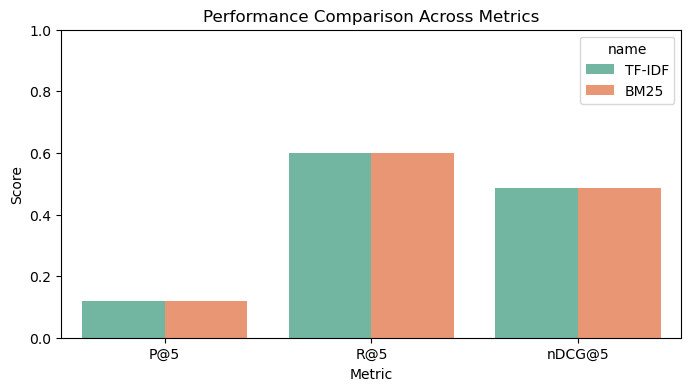

In [82]:
exp_melt = exp.melt(id_vars="name", var_name="Metric", value_name="Score")
plt.figure(figsize=(8,4))
sns.barplot(data=exp_melt, x="Metric", y="Score", hue="name", palette="Set2")
plt.title("Performance Comparison Across Metrics")
plt.ylim(0,1)
plt.show()

## Building the UI

In [83]:
# Initialize a new Flask web application
# Flask is a lightweight Python web framework ideal for demos
app = Flask(__name__)
username = os.environ.get("JUPYTERHUB_USER")
# app.config['APPLICATION_ROOT'] = f'/user/{username}/proxy/5000'

In [84]:
# Run this cell once to load the svg into the static directory for the favicon
svg_content = """
<svg xmlns="http://www.w3.org/2000/svg" width="16" height="16" fill="currentColor" class="bi bi-search" viewBox="0 0 16 16">
  <path d="M11.742 10.344a6.5 6.5 0 1 0-1.397 1.398h-.001q.044.06.098.115l3.85 3.85a1 1 0 0 0 1.415-1.414l-3.85-3.85a1 1 0 0 0-.115-.1zM12 6.5a5.5 5.5 0 1 1-11 0 5.5 5.5 0 0 1 11 0"/>
</svg>
"""

with open("static/favicon.svg", "w") as f:
    f.write(svg_content.strip())

In [85]:
# Search endpoint: This route handles search requests like: /search?q=privacy
@app.route("/", methods=["GET"])
def search():
    query = request.args.get("q", "")
    results = None

    if query:
        res = bm25.search(query).head(5)
        results = []
        for _, row in res.iterrows():
            doc = df.loc[df["docno"] == row["docno"]].iloc[0]
            results.append({
                "rank": len(results) + 1,
                "docno": row["docno"],
                "snippet": doc["text"][:200],
                "score": round(row["score"], 3)
            })
            
    proxy_prefix = f"2025-autumn-info-376-a/user/{username}/proxy/5000"
    return render_template("index.html", results=results, query=query)

# Doc endpoint: This route handles get requests to view doc full text
@app.route("/doc/<docno>")
def display_doc(docno):
    doc = df.loc[df["docno"] == docno].iloc[0]
    proxy_prefix = f"2025-autumn-info-376-a/user/{username}/proxy/5000"
    return render_template("doc_view.html", docno=docno, full_text=doc["text"])


In [ ]:
# Run app (on jupyter server)
# username = os.environ.get("JUPYTERHUB_USER")
print("TechGlossary search ui running at:")
print(f"https://jupyter.rttl.uw.edu/2025-autumn-info-376-a/user/{username}/proxy/5000/")
app.run(host="0.0.0.0", port=5000, debug=False, use_reloader=False)

TechGlossary search ui running at:
https://jupyter.rttl.uw.edu/2025-autumn-info-376-a/user/laurak11/proxy/5000/
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://10.2.195.47:5000
Press CTRL+C to quit
127.0.0.1 - - [02/Dec/2025 20:36:47] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Dec/2025 20:36:50] "GET /?q=xform HTTP/1.1" 200 -
127.0.0.1 - - [02/Dec/2025 20:36:52] "GET /doc/xforms HTTP/1.1" 200 -
127.0.0.1 - - [02/Dec/2025 20:37:15] "GET /?q=hardhat HTTP/1.1" 200 -
127.0.0.1 - - [02/Dec/2025 20:37:16] "GET /doc/Hardhat HTTP/1.1" 200 -
127.0.0.1 - - [02/Dec/2025 20:37:21] "GET /doc/Hardhat HTTP/1.1" 200 -
127.0.0.1 - - [02/Dec/2025 20:37:31] "GET /?q=ethereum HTTP/1.1" 200 -
127.0.0.1 - - [02/Dec/2025 20:37:36] "GET /?q=javascript HTTP/1.1" 200 -
127.0.0.1 - - [02/Dec/2025 20:38:09] "GET /?q=pub+sub HTTP/1.1" 200 -
127.0.0.1 - - [02/Dec/2025 20:38:16] "GET /?q=pub HTTP/1.1" 200 -
127.0.0.1 - - [02/Dec/2025 20:38:20] "GET /?q=python HTTP/1.1" 200 -
127.0.0.1 - - [02/Dec/2025 20:38:25] "GET /doc/python HTTP/1.1" 200 -
[2025-12-02 20:38:39,524] ERROR in app

In [ ]:
res = bm25.search("R studio").head(5)
results = []
print(res)
